In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import re
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [5]:
bbc_data = pd.read_csv("./datasets/BBC News Train.csv")
ml_data = pd.read_csv("./datasets/money_laundering_articles.csv")

In [6]:
print(bbc_data.shape)
bbc_data.sample(5)

(1490, 3)


,ArticleId,Text,Category
837,1115,pop band busted to take a break chart-toppin...,entertainment
761,359,iraq to invite phone licence bids iraq is to i...,business
263,2151,spain coach faces racism inquiry spain s footb...,sport
1450,2149,standard life concern at lse bid standard life...,business
665,1603,singer knight backs anti-gun song r&b star bev...,entertainment


In [7]:
print(ml_data.shape)
ml_data.sample(5)

(61, 8)


,title,text,source_url,money_laundering,allegations,accusations,charges_conviction,sentencing
40,Haulier ran Europe-wide drug ring from living ...,A UK-based haulier shipped drugs for gangs acr...,https://www.bbc.com/news/uk-55402733,1,0,0,1,1
39,Westpac bank to pay record Australian fine ove...,Australia's Westpac bank has negotiated to pay...,https://www.bbc.com/news/world-australia-54275165,1,0,0,0,0
23,Fake exotic dancer companies forfeit £5m in la...,Police have recovered more than £5m from three...,https://www.bbc.com/news/uk-england-manchester...,1,0,1,0,0
4,Defense lawyers say 1st Amendment protected ad...,Lawyers defending the founders of the classifi...,https://www.local10.com/news/politics/2021/09/...,1,1,0,0,0
42,Ecclestone burglary trial: Accused 'was in Lon...,An escort accused of helping burglars steal pr...,https://www.bbc.com/news/uk-england-london-551...,1,0,1,0,0


In [8]:
bbc_data['text_length'] = bbc_data['Text'].str.len()

Text(0.5, 1.0, 'Distribution of Article Lengths')

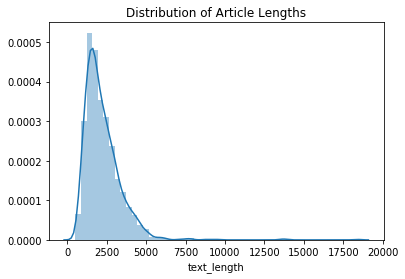

In [9]:
sns.distplot(bbc_data['text_length']).set_title('Distribution of Article Lengths')

Text(0.5, 1.0, 'Distribution of Article Lengths')

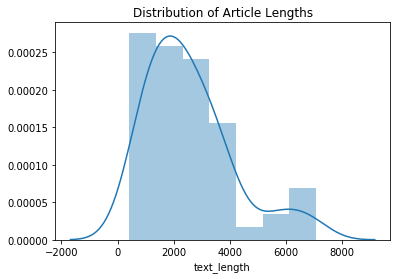

In [10]:
ml_data['text_length'] = ml_data['text'].str.len()
sns.distplot(ml_data['text_length']).set_title('Distribution of Article Lengths')

In [11]:
def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    
    
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    text = " ".join(filtered_sentence)
    return text

In [12]:
ml_data['text_parsed'] = ml_data['text'].apply(process_text)

In [13]:
ml_data[['text', 'text_parsed']].head()

,text,text_parsed
0,"When he was running for mayor in 2016, then-No...",running mayor 2016 thennorfolk sheriff bob mcc...
1,\nED has been probing the former legislator on...,ed probing former legislator money laundering ...
2,\n\nThe Enforcement Directorate has issued a l...,enforcement directorate issued lookout notice ...
3,\tMinutes after landing a private jet at Biggi...,minutes landing private jet biggin hill airfie...
4,Lawyers defending the founders of the classifi...,lawyers defending founders classified site bac...


In [14]:
bbc_data['text_parsed'] = bbc_data['Text'].apply(process_text)

In [15]:
bbc_data.to_csv('./datasets/bbc_news_processed.csv')

In [16]:
ml_data.to_csv('./datasets/money_laundering_news_processed.csv')

In [17]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

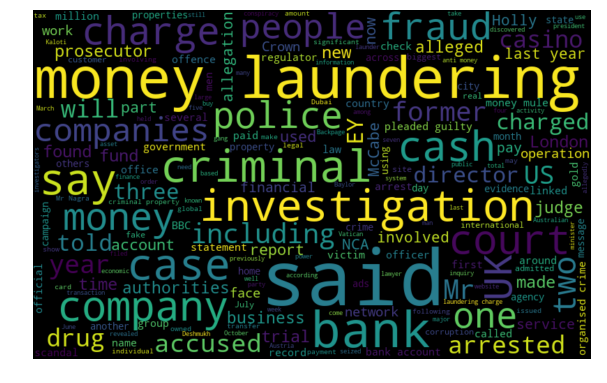

In [18]:
subset=ml_data[ml_data.money_laundering==1]
text=subset.text.values
words =" ".join(text)
create_wordcloud(words)

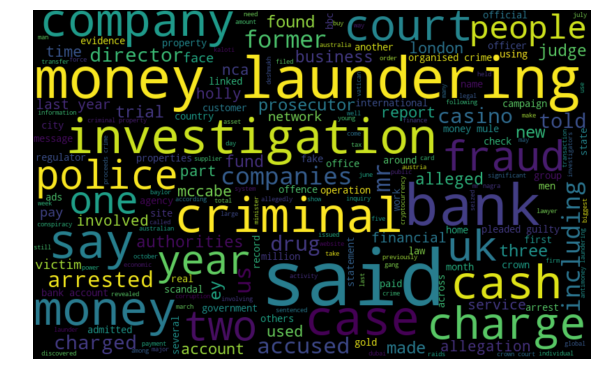

In [19]:
subset=ml_data[ml_data.money_laundering==1]
text=subset.text_parsed.values
words =" ".join(text)
create_wordcloud(words)

In [20]:
bbc_data_200 = bbc_data.sample(200-ml_data.shape[0])
bbc_data_200.shape


(139, 5)

In [21]:
bbc_data_200['money_laundering'] = 0


In [22]:
bbc_data_200.head()

,ArticleId,Text,Category,text_length,text_parsed,money_laundering
1278,1169,redknapp poised for saints southampton are set...,sport,1994,redknapp poised saints southampton set unveil ...,0
1105,1831,tough rules for ringtone sellers firms that fl...,tech,3562,tough rules ringtone sellers firms flout rules...,0
1239,1610,a year to remember for irish there used to be ...,sport,4516,year remember irish used one subliminal moment...,0
1424,1089,germany calls for eu reform german chancellor ...,business,2371,germany calls eu reform german chancellor gerh...,0
1345,1788,fast lifts rise into record books two high-spe...,tech,2268,fast lifts rise record books two highspeed lif...,0


In [23]:
data_200 = pd.concat([ml_data[['text_parsed', 'money_laundering']], bbc_data_200[['text_parsed', 'money_laundering']]], axis=0)


In [24]:
data_200.sample(5)

,text_parsed,money_laundering
1456,blair told double overseas aid tony blair urge...,0
50,two scammers used schools name defraud student...,1
1166,fuming robinson blasts officials england coach...,0
879,nasdaq planning 100mshare sale owner technolog...,0
820,levy tipped whitbread prize novelist andrea le...,0


#### Creating the data file from which to model

In [25]:
data_200['text_parsed_length'] = data_200['text_parsed'].str.len()


Text(0.5, 1.0, 'Distribution of Text Lengths')

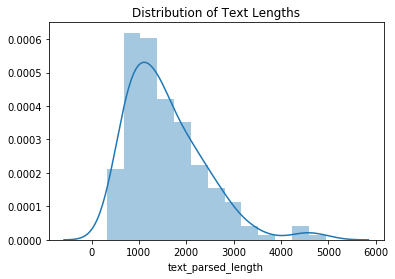

In [26]:
sns.distplot(data_200['text_parsed_length']).set_title('Distribution of Text Lengths')


In [27]:
data_200.head()


,text_parsed,money_laundering,text_parsed_length
0,running mayor 2016 thennorfolk sheriff bob mcc...,1,2796
1,ed probing former legislator money laundering ...,1,2513
2,enforcement directorate issued lookout notice ...,1,1891
3,minutes landing private jet biggin hill airfie...,1,4585
4,lawyers defending founders classified site bac...,1,2580


In [28]:
data_200.to_csv('./datasets/data_200.csv', index=False)
